In [1]:
import networkx as nx
import json
from openeo_pg_parser_networkx.graph import OpenEOProcessGraph

from openeo_pg_parser_networkx.pg_schema import ProcessNode, ResultReference, PGEdgeType
import json

In [2]:
flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


Deserialised process graph into nested structure


Walking node root-1b859ccb-2295-43bd-a108-c794d09bc9a8
Walking node mintime-1b859ccb-2295-43bd-a108-c794d09bc9a8
Walking node min-842b2a0b-4821-46bb-9907-30b6ee5afd69
Walking node evi-1b859ccb-2295-43bd-a108-c794d09bc9a8
Walking node m3-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node div-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node sub-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node nir-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node red-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node sum-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node nir-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node m1-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node red-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node m2-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node blue-84eb78da-c15e-42df-87d0-542b45d2c3d2
Walking node load_collection-1b859ccb-2295-43bd-a108-c794d09bc9a8


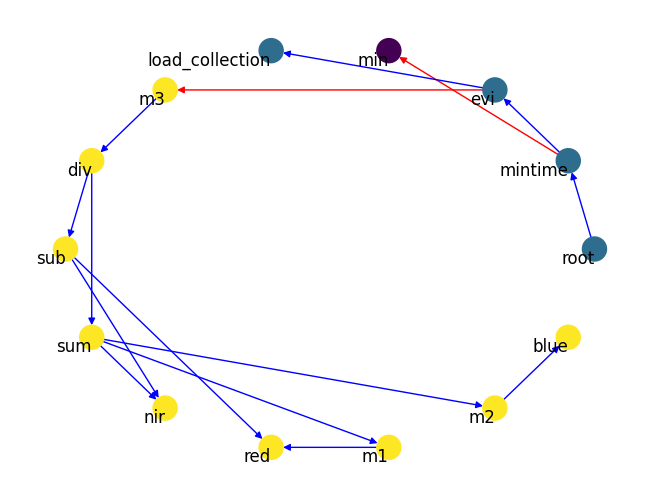

In [3]:
parsed_graph.plot()

In [4]:
parsed_graph.G.nodes

NodeView(('root-1b859ccb-2295-43bd-a108-c794d09bc9a8', 'mintime-1b859ccb-2295-43bd-a108-c794d09bc9a8', 'evi-1b859ccb-2295-43bd-a108-c794d09bc9a8', 'min-842b2a0b-4821-46bb-9907-30b6ee5afd69', 'load_collection-1b859ccb-2295-43bd-a108-c794d09bc9a8', 'm3-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'div-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'sub-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'sum-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'nir-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'red-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'm1-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'm2-84eb78da-c15e-42df-87d0-542b45d2c3d2', 'blue-84eb78da-c15e-42df-87d0-542b45d2c3d2'))

In [5]:
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

{'root-1b859ccb-2295-43bd-a108-c794d09bc9a8': {'data': ResultReference(from_node='mintime', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute a minimum time composite by reducing the temporal dimension', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='evi', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute the EVI. Formula: 2.5 * (NIR - RED) / (1 + NIR + 6*RED + -7.5*BLUE)', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='load_collection', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description='Loading the data', arguments={'id': ProcessArgument(__root__='Sentinel-2'), 'spatial_extent': ProcessArgument(__root__=BoundingBox(west=16.1, east=16.6, north=48.6, south=47.2, base=None, height=None, crs='EPSG:4326')), 'temporal_extent': ProcessArgument(__root__=TemporalInterval(__root__=[Date(__root__='2018-01-01'), Da

In [6]:
for edge in parsed_graph.G.edges(data=True):
    print(edge)

('root-1b859ccb-2295-43bd-a108-c794d09bc9a8', 'mintime-1b859ccb-2295-43bd-a108-c794d09bc9a8', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_substitutions': [ArgSubstitution(arg_name='data', access_func=functools.partial(<function OpenEOProcessGraph._walk_node.<locals>.<lambda> at 0x7f0cef31cca0>, node_uid='root-1b859ccb-2295-43bd-a108-c794d09bc9a8', arg_name='data'), key='data')]})
('mintime-1b859ccb-2295-43bd-a108-c794d09bc9a8', 'evi-1b859ccb-2295-43bd-a108-c794d09bc9a8', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_substitutions': [ArgSubstitution(arg_name='data', access_func=functools.partial(<function OpenEOProcessGraph._walk_node.<locals>.<lambda> at 0x7f0cef31ce50>, node_uid='mintime-1b859ccb-2295-43bd-a108-c794d09bc9a8', arg_name='data'), key='data')]})
('mintime-1b859ccb-2295-43bd-a108-c794d09bc9a8', 'min-842b2a0b-4821-46bb-9907-30b6ee5afd69', {'reference_type': <PGEdgeType.Callback: 'callback'>, 'arg_name': 'reducer'})
(

In [7]:
nx.node_link_data(parsed_graph.G)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'process_id': 'save_result',
   'resolved_kwargs': {'data': ResultReference(from_node='mintime', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute a minimum time composite by reducing the temporal dimension', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='evi', node=ProcessNode(process_id='reduce_dimension', namespace=None, result=False, description='Compute the EVI. Formula: 2.5 * (NIR - RED) / (1 + NIR + 6*RED + -7.5*BLUE)', arguments={'data': ProcessArgument(__root__=ResultReference(from_node='load_collection', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description='Loading the data', arguments={'id': ProcessArgument(__root__='Sentinel-2'), 'spatial_extent': ProcessArgument(__root__=BoundingBox(west=16.1, east=16.6, north=48.6, south=47.2, base=None, height=None, crs='EPSG:4326')), 'temporal_extent': ProcessArgu

## Second Process Graph

In [8]:
flat_graph = json.load(open("../tests/data/fit_rf_pg_0.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


Deserialised process graph into nested structure


Walking node root-db53254f-2d34-4e4d-8670-536b89563d1a
Walking node fitregrrandomforest1-db53254f-2d34-4e4d-8670-536b89563d1a


AttributeError: 'NoneType' object has no attribute '__root__'

## Experiments

In [16]:
import inspect

for edge in parsed_graph.G.out_edges:
    print("----------------------------------------------")
    if parsed_graph.G.edges[edge]["reference_type"] == PGEdgeType.ResultReference:
        node_where_parameter_belongs_to = parsed_graph.G.nodes[edge[0]]

        for arg_sub in parsed_graph.G.edges[edge]["arg_substitutions"]:
            arg_sub.access_func(new_value="please_change", set_bool=True)
            print("wait")

print(parsed_graph.G.nodes(data=True))


----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
----------------------------------------------
wait
----------------------------------------------
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
wait
----------------------------------------------
wait
wait
----------------------------------------------
wait
----------------------------------------------
wait
----------------------------------------------
wait
[('root-4612

In [ ]:
{node: node_name for node, node_name in nx.get_node_attributes(parsed_graph.G, "node_name").items()}

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_edge("here", "there", reference_type="Callback")
G.add_edge("here", "there", reference_type="Callback", tryout="hello")
G.add_edge("here", "there", reference_type="Callback", tryout="hehe")

G.edges(data=True)

In [ ]:
"hfere" in G

In [ ]:
for u, v, data in G.out_edges("here", data=True):
    print(type(u))
    print(v)
    if data["reference_type"] == "Callback":
        print(u)
        print(v)

In [9]:
from openeo_pg_parser_networkx.graph import OpenEOProcessGraph
import json
import networkx as nx


flat_graph = json.load(open("../tests/data/load_save.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)

print(parsed_graph)
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

Deserialised process graph into nested structure


Walking node root-859f5d3b-c6b5-4779-a068-18be79024553
Walking node loadcollection1-859f5d3b-c6b5-4779-a068-18be79024553


{'root-859f5d3b-c6b5-4779-a068-18be79024553': {'data': ResultReference(from_node='loadcollection1', node=ProcessNode(process_id='load_collection', namespace=None, result=False, description=None, arguments={'bands': ProcessArgument(__root__=['band_1']), 'id': ProcessArgument(__root__='corine_land_cover'), 'spatial_extent': ProcessArgument(__root__=BoundingBox(west=13.1, east=13.0, north=45.2, south=45.1, base=None, height=None, crs=<Derived Projected CRS: EPSG:26915>
  Name: NAD83 / UTM zone 15N
  Axis Info [cartesian]:
  - E[east]: Easting (metre)
  - N[north]: Northing (metre)
  Area of Use:
  - name: North America - between 96°W and 90°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Arkansas; Illinois; Iowa; Kansas; Louisiana; Michigan; Minnesota; Mississippi; Missouri; Nebraska; Oklahoma; Tennessee; Texas; Wisconsin.
  - bounds: (-96.0, 25.61, -90.0, 84.0)
  Coordinate Operation:
  - name: UTM zone 15N
  - method: Transverse Mercator
  Datum: Nor